# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

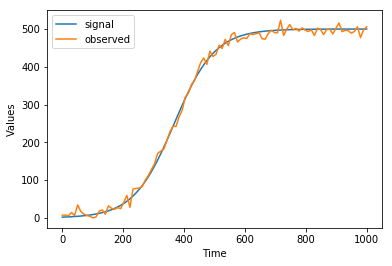

In [1]:
import os
os.chdir('C:\\Users\\bclamber\\Desktop\\AllPints\\pints4\\pints')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set number of initial rejection samples (before ellipsoidal sampling begins)
sampler.set_rejection_samples(200)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Set gaps between updating ellipsoid
sampler.set_ellipsoid_update_gap(100)

# Set the number of active points
sampler.set_n_active_points(400)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection Sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z)
0     1       0:00.0 -inf        
0     2       0:00.0 -inf        
0     3       0:00.0 -inf        
0     4       0:00.0 -inf        
0     5       0:00.0 -inf        
0     21      0:00.0 -inf        
0     41      0:00.0 -inf        
0     61      0:00.0 -inf        
0     81      0:00.0 -inf        
0     101     0:00.0 -inf        
0     121     0:00.0 -inf        
0     141     0:00.0 -inf        
0     161     0:00.0 -inf        
0     181     0:00.0 -inf        
0     201     0:00.0 -inf        
0     221     0:00.0 -inf        
0     241     0:00.0 -inf        
0     261     0:00.0 -inf        
0     281     0:00.0 -inf        
0     301     0:00.0 -inf        
0     321     0:00.0 -inf        
0     341     0:00.0 -inf        
0     361     0:00.0 -inf        
0     381     0:00.0 -inf        
400

C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1420  3643    0:01.1 -233.5482831
1440  3735    0:01.1 -222.5006101
1460  3841    0:01.2 -208.7824262
1480  3907    0:01.2 -196.7867711
1500  4001    0:01.2 -186.9691826
1520  4091    0:01.2 -178.6240934
1540  4171    0:01.3 -172.5772309
1560  4231    0:01.3 -165.1586754
1580  4321    0:01.3 -159.3781682
1600  4423    0:01.3 -151.7560964
1620  4489    0:01.4 -144.7564808
1640  4543    0:01.4 -138.7038747
1660  4595    0:01.4 -133.7043161
1680  4677    0:01.4 -128.4262733
1700  4759    0:01.4 -123.5351696
1720  4823    0:01.5 -119.028282 
1740  4973    0:01.5 -117.9638794
1760  5083    0:01.5 -115.5834572
1780  5215    0:01.6 -113.4523773
1800  5349    0:01.6 -111.4632279
1820  5423    0:01.6 -109.9149381
1840  5475    0:01.6 -108.2184463
1860  5553    0:01.7 -105.9071877
1880  5611    0:01.7 -103.5957723
1900  5689    0:01.7 -101.2641278
1920  5747    0:01.7 -98.70545794
1940  5803    0:01.7 -96.70962279
1960  5863    0:01.8 -94.61573923
1980  5929    0:01.8 -92.26134303
2000  6001    

## Plot posterior samples versus true parameter values (dashed lines)

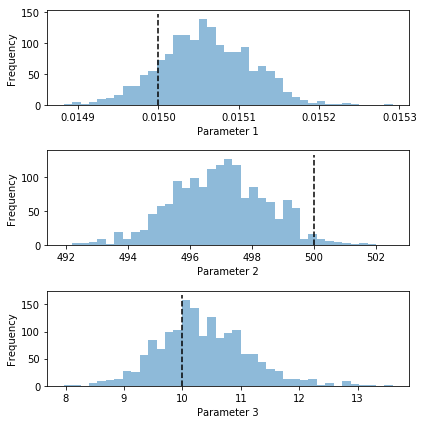

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

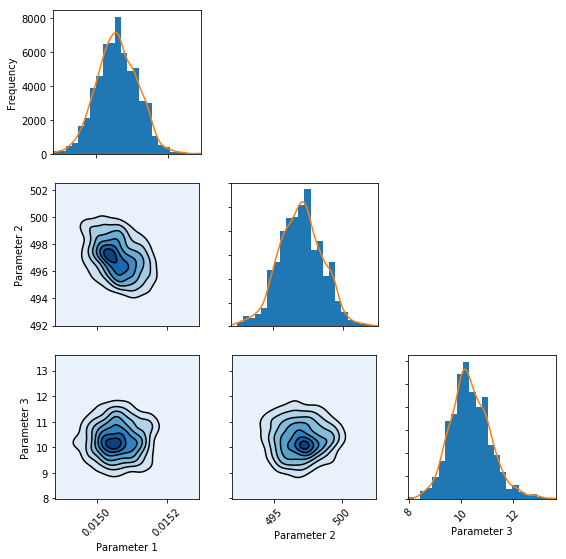

In [5]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

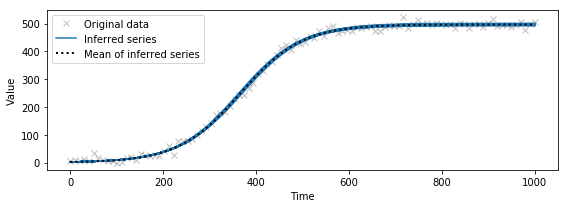

In [6]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [7]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -385.180979657 ± 0.0791906883019


## Effective sample size

In [8]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1621.47504809
